In [32]:
from sklearn import svm,datasets
import pandas as pd`

In [7]:
dig = datasets.load_digits()

In [17]:
df = pd.DataFrame(dig.data,columns=dig.feature_names)

In [23]:
df['number'] = dig.target
df['number'] = df['number'].apply(lambda x: dig.target_names[x])

In [26]:
df.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [28]:
images = dig.images
labels = dig.target


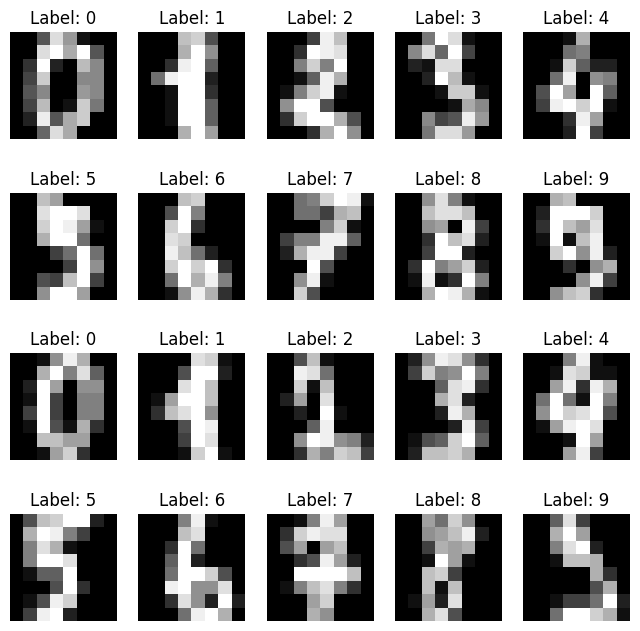

In [35]:
# Define a function to plot a grid of images
def plot_images(images, labels, rows=4, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()

# Plot the images in a grid
plot_images(images, labels)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train,y_test = train_test_split(dig.data,dig.target,test_size=0.2)

In [38]:
X_test.shape

(360, 64)

In [39]:
X_train.shape

(1437, 64)

In [53]:
model = svm.SVC(kernel='linear',gamma='auto',C=30)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9833333333333333

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=32) # estimators means no. of trees it will make
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9805555555555555

In [55]:
y_predicted= model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

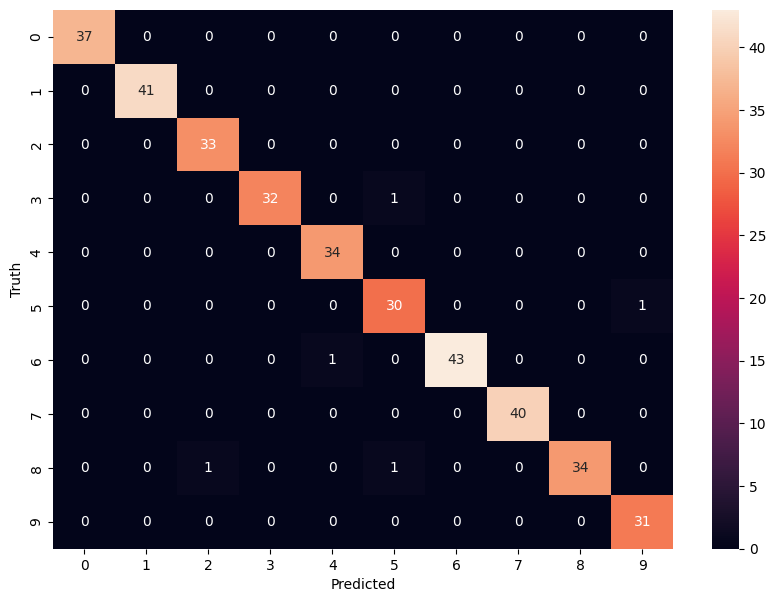

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),dig.data, dig.target, cv=5)

array([0.96388889, 0.91944444, 0.96657382, 0.9637883 , 0.92479109])

In [59]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),dig.data, dig.target, cv=5)

array([0.45277778, 0.46944444, 0.47910864, 0.47910864, 0.50139276])

In [60]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),dig.data, dig.target, cv=5)

array([0.45277778, 0.46944444, 0.47910864, 0.47910864, 0.50139276])

In [63]:
import  numpy as np
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),dig.data, dig.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.448545341999381,
 'rbf_10': 0.47636645001547506,
 'rbf_20': 0.47636645001547506,
 'linear_1': 0.9476973073351903,
 'linear_10': 0.9476973073351903,
 'linear_20': 0.9476973073351903}

In [67]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svm.SVC(gamma = 'auto') ,{
    'C' : [5,10,20],
    'kernel' : ['linear','rbf']
},cv = 5, return_train_score = False)

# Fit the GridSearchCV object to find the best hyperparameters
grid_search.fit(X_train, y_train)
grid_search.cv_results_

{'mean_fit_time': array([0.03156376, 0.30095696, 0.03437467, 0.29687586, 0.0409133 ,
        0.29700575]),
 'std_fit_time': array([5.04722728e-03, 5.18614619e-03, 6.25600856e-03, 4.31425649e-06,
        7.90990471e-03, 2.67942797e-04]),
 'mean_score_time': array([0.01410522, 0.06848555, 0.00937381, 0.06874828, 0.        ,
        0.07187462]),
 'std_score_time': array([0.00304837, 0.00583783, 0.00765368, 0.00765401, 0.        ,
        0.00765736]),
 'param_C': masked_array(data=[5, 5, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 5, 'kernel': 'linear'},
  {'C': 5, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C':

In [69]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031564,0.005047,0.014105,0.003048,5,linear,"{'C': 5, 'kernel': 'linear'}",0.965278,0.975694,0.975610,0.986063,0.972125,0.974954,0.006723,1
1,0.300957,0.005186,0.068486,0.005838,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.493056,0.475694,0.456446,0.501742,0.540070,0.493402,0.028024,4
2,0.034375,0.006256,0.009374,0.007654,10,linear,"{'C': 10, 'kernel': 'linear'}",0.965278,0.975694,0.975610,0.986063,0.972125,0.974954,0.006723,1
3,0.296876,0.000004,0.068748,0.007654,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.493056,0.475694,0.456446,0.501742,0.540070,0.493402,0.028024,4
4,0.040913,0.007910,0.000000,0.000000,20,linear,"{'C': 20, 'kernel': 'linear'}",0.965278,0.975694,0.975610,0.986063,0.972125,0.974954,0.006723,1
5,0.297006,0.000268,0.071875,0.007657,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.493056,0.475694,0.456446,0.501742,0.540070,0.493402,0.028024,4


In [70]:
df[['param_C','param_kernel','mean_test_score']]


,param_C,param_kernel,mean_test_score
0,5,linear,0.974954
1,5,rbf,0.493402
2,10,linear,0.974954
3,10,rbf,0.493402
4,20,linear,0.974954
5,20,rbf,0.493402


In [72]:
grid_search.best_params_

{'C': 5, 'kernel': 'linear'}

In [74]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma = 'auto') ,{
    'C' : [5,10,20],
    'kernel' : ['linear','rbf']
},cv = 5, return_train_score = False,n_iter=2)

# Fit the GridSearchCV object to find the best hyperparameters
rs.fit(X_train, y_train)
rs.cv_results_

{'mean_fit_time': array([0.0425437 , 0.32299423]),
 'std_fit_time': array([0.00586664, 0.01788497]),
 'mean_score_time': array([0.00320077, 0.06789975]),
 'std_score_time': array([0.00640154, 0.00708239]),
 'param_kernel': masked_array(data=['linear', 'rbf'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[5, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'C': 5}, {'kernel': 'rbf', 'C': 20}],
 'split0_test_score': array([0.96527778, 0.49305556]),
 'split1_test_score': array([0.97569444, 0.47569444]),
 'split2_test_score': array([0.97560976, 0.45644599]),
 'split3_test_score': array([0.98606272, 0.50174216]),
 'split4_test_score': array([0.97212544, 0.54006969]),
 'mean_test_score': array([0.97495403, 0.49340157]),
 'std_test_score': array([0.00672327, 0.02802447]),
 'rank_test_score': array([1, 2])}

In [75]:

pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,5,linear,0.974954
1,20,rbf,0.493402


In [76]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_params = {
    'svm':{
        'model' : svm.SVC(gamma='auto'),
        'params' : {
                'C' : [5,10,20],
                'kernel' : ['linear','rbf']
        }},
#logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, class_weight=None, random_state=42)
    'logistic' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'C': [1,5,10],
            'max_iter':[50,100]
        }
    },

  'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,50]
        }
    },
    'decision_tree' : {
    'model': DecisionTreeClassifier(),
    'params': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
},
    'multinomial_nb_config' : {
    'model': MultinomialNB(),
    'params': {
        'alpha': [0.1, 0.5, 1.0, 2.0]  # Hyperparameter: Additive (Laplace/Lidstone) smoothing parameter
    }
},
    'gaussian_nb_config' : {
    'model': GaussianNB(),
    'params': {
        
    }
}

}


In [80]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(dig.data, dig.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecate

,model,best_score,best_params
0,svm,0.947697,"{'C': 5, 'kernel': 'linear'}"
1,logistic,0.922114,"{'C': 1, 'max_iter': 50}"
2,random_forest,0.932134,{'n_estimators': 50}
3,decision_tree,0.787439,"{'criterion': 'entropy', 'max_depth': 50, 'max..."
4,multinomial_nb_config,0.871464,{'alpha': 2.0}
5,gaussian_nb_config,0.806928,{}
